In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
gender_data=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.metrics import accuracy_score

In [4]:
print("train datasets")
train_data.head(10)


train datasets


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print("test datasets")
test_data.head(10)

test datasets


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
missing_values = train_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
def clean(d):
    d.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
    d.Age= train_data.Age.fillna(train_data.Age.mean())
    d.dropna()
    return d 




In [8]:
clean(train_data)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0
887,888,1,1,female,19.000000,0,0
888,889,0,3,female,29.699118,1,2
889,890,1,1,male,26.000000,0,0


In [9]:
clean(test_data)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,22.000000,0,0
1,893,3,female,38.000000,1,0
2,894,2,male,26.000000,0,0
3,895,3,male,35.000000,0,0
4,896,3,female,35.000000,1,1
...,...,...,...,...,...,...
413,1305,3,male,29.699118,0,0
414,1306,1,female,44.000000,0,0
415,1307,3,male,29.699118,0,0
416,1308,3,male,34.000000,0,0


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [12]:
# train_data.Sex=pd.get_dummies(train_data.Sex)
train_data['Sex']=train_data['Sex'].replace({'male':1,'female':0})
test_data['Sex']=train_data['Sex'].replace({'male':1,'female':0})

/tmp/ipykernel_17/2630419799.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Sex']=train_data['Sex'].replace({'male':1,'female':0})


In [13]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [14]:
X=train_data.drop(['Survived',"PassengerId"],axis=1)
y=train_data.Survived

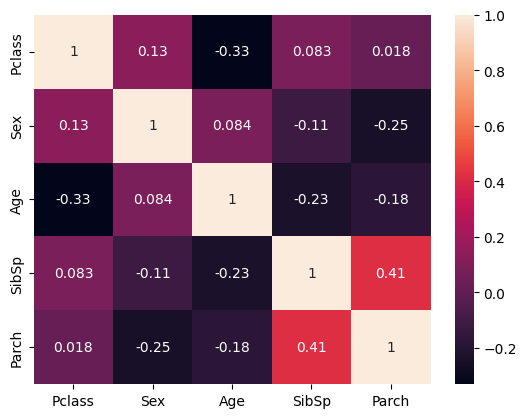

,Pclass,Sex,Age,SibSp,Parch
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=X.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()
corr_matrix

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [17]:
accuricess=[]

In [18]:
from sklearn.model_selection import GridSearchCV

def all(model):
    
    if isinstance(model, LogisticRegression):
        param_grid = {
            'C': [0.1, 0,5, 0.75, 1, 10]
        }
    elif isinstance(model, RandomForestClassifier):
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [None, 10]
        }
    elif isinstance(model, GradientBoostingClassifier):
        param_grid = {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3]
        }
    elif isinstance(model, DecisionTreeClassifier):
        param_grid = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10]
        }
    elif isinstance(model, KNeighborsClassifier):
        param_grid = {
            'n_neighbors': [5],
            'weights': ['uniform']
        }
    elif isinstance(model, GaussianNB):
        param_grid = {}  
    elif isinstance(model, SVC):
        param_grid = {
            'C': [1, 10],
            'kernel': ['rbf']
        }
    else:
        raise ValueError("Unsupported model type")

    
    grid_search = GridSearchCV(model, param_grid, cv=3)  
    grid_search.fit(X_train, y_train)
    
   
    best_model = grid_search.best_estimator_
    pre = best_model.predict(X_test)
    
    
    accuracy = accuracy_score(pre, y_test)
    print('Accuracy = ', accuracy)
    accuricess.append(accuracy)
    
    
    print('Best Parameters:', grid_search.best_params_)


In [19]:
model1=LogisticRegression()
all(model1)

Accuracy =  0.8324022346368715
Best Parameters: {'C': 0.1}


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/

In [20]:
model2=RandomForestClassifier()
all(model2)

Accuracy =  0.8268156424581006
Best Parameters: {'max_depth': 10, 'n_estimators': 50}


In [21]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy =  0.8212290502793296
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [22]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy =  0.770949720670391
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}


In [23]:
model5=KNeighborsClassifier()
all(model5)

Accuracy =  0.776536312849162
Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}


In [24]:
model6=GaussianNB()
all(model6)

Accuracy =  0.7597765363128491
Best Parameters: {}


In [25]:
model7=SVC()
all(model7)

Accuracy =  0.7932960893854749
Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [26]:
Algorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier',
            'DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [27]:
pd.DataFrame({'Algorithms':Algorithms ,'accuricess':accuricess})


,Algorithms,accuricess
0,LogisticRegression,0.832402
1,RandomForestClassifier,0.826816
2,GradientBoostingClassifier,0.821229
3,DecisionTreeClassifier,0.770950
4,KNeighborsClassifier,0.776536
5,GaussianNB,0.759777
6,SVC,0.793296


In [28]:
print(len(Algorithms))
print(len(accuricess))

7
7


In [29]:
modelx=LogisticRegression()
modelx.fit(X_train,y_train)

LogisticRegression()

In [30]:
test_data_new=test_data.drop(["PassengerId"],axis=1)
Last_predict= modelx.predict(test_data_new)

In [31]:
Final=test_data.PassengerId

In [32]:
df_new=pd.DataFrame({'PassengerId':Final,'Survived':Last_predict})
df_new

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,1
416,1308,1


In [33]:
df_new.to_csv('submission.csv',index=False)